In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
#Načíta knihovny.

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
#Načíta soubor CSV do dataframe.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Jednorozměrná analýza


In [ ]:
df.describe()
#Statistický přehled o číselných sloupcích v datovém rámci.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns
#Vypíše názvy všech sloupců v dataframe.

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

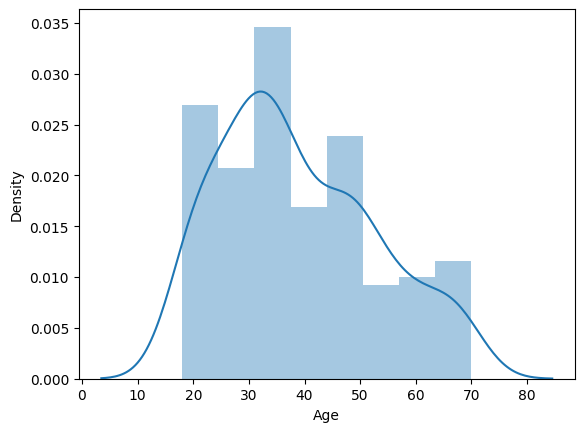

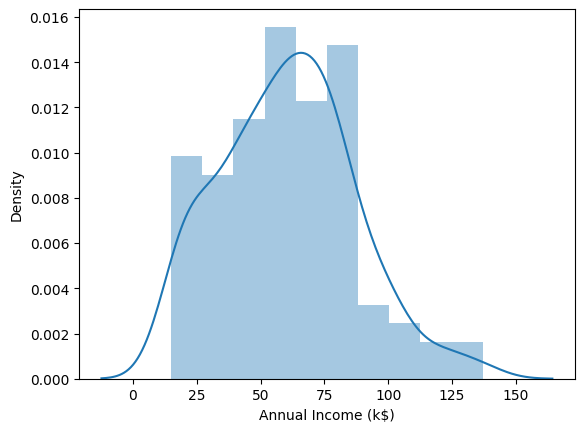

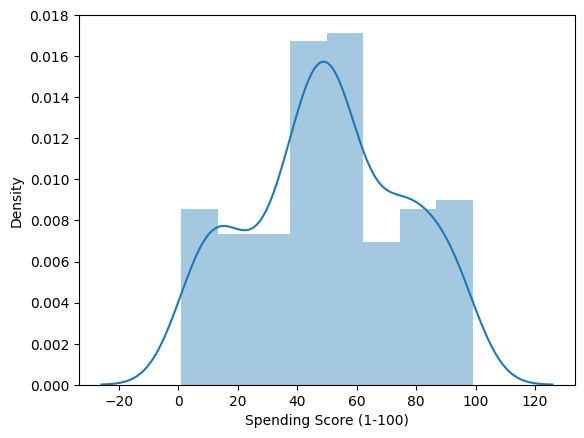

In [ ]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
#Vytvoří seznam názvů sloupců.
for i in columns:
    plt.figure()
    sns.distplot(df[i])
#Spouští cyklus, který projde každý název sloupce ve výše uvedeném seznamu a vytvoří graf.

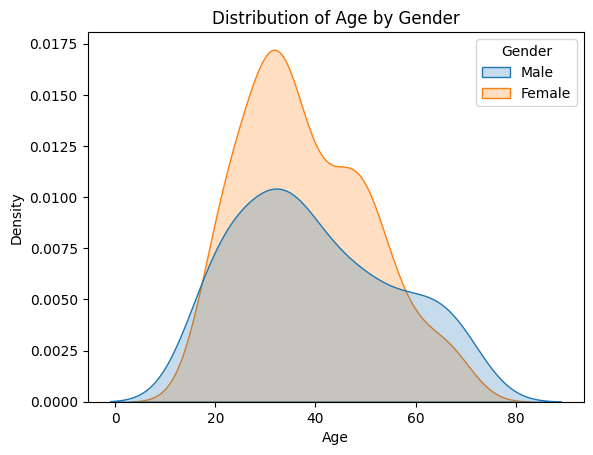

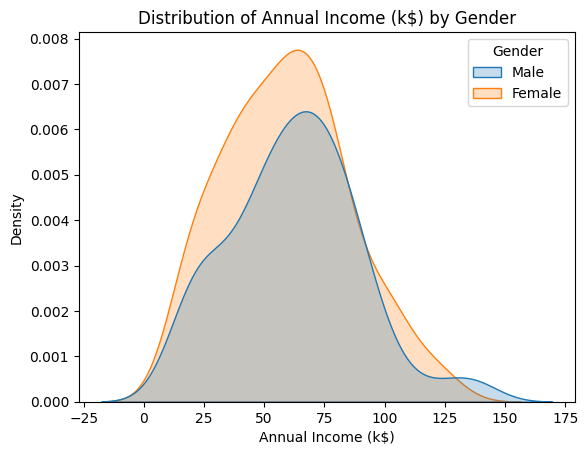

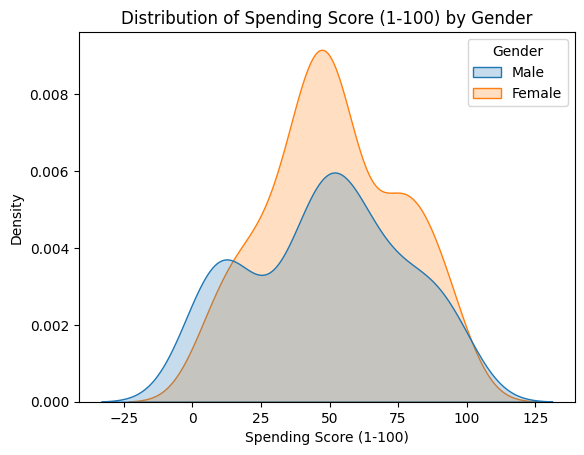

In [ ]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Gender', fill=True)
    plt.title(f'Distribution of {col} by Gender')
    plt.show()
#Vytvoří porovnání hustoty rozložení pro zadané sloupce podle pohlaví.

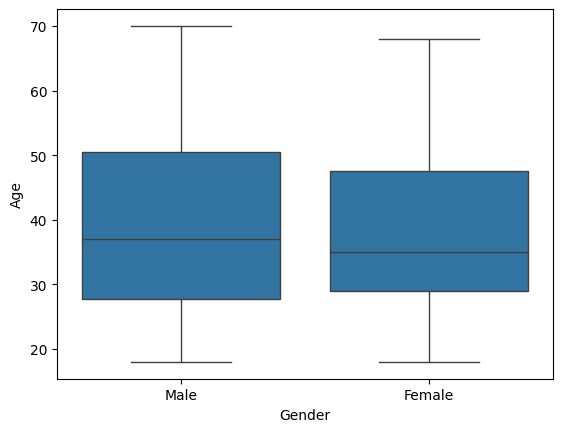

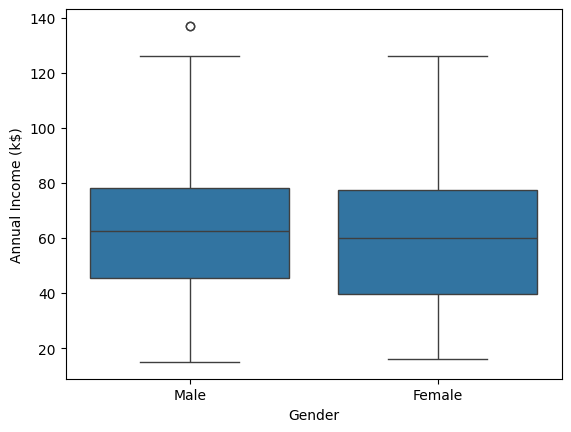

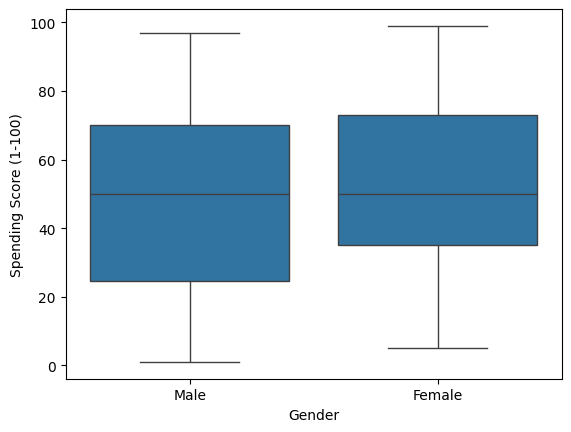

In [ ]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i])
    plt.show()
#Vykreslí boxploty pro sloupce:'Age', 'Annual Income (k$)', 'Spending Score (1-100).

In [ ]:
df['Gender'].value_counts(normalize=True)
#Vrací relativní četnosti (v procentech) výskytu jednotlivých hodnot ve sloupci 'Gender'.

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Dvojrozměrná analýza

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

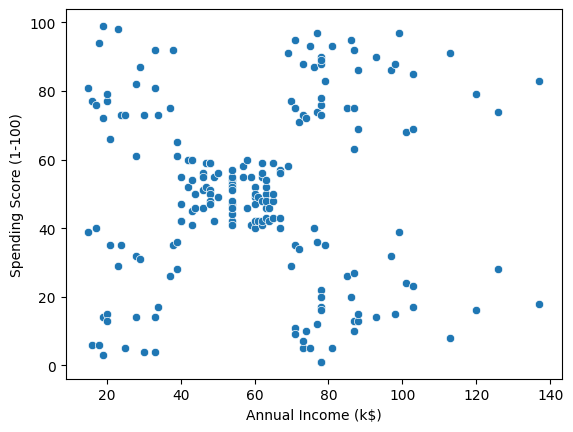

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
#Vytvoří rozptylový graf (scatter plot), který zobrazuje vztah mezi ročním příjmem a skóre utrácení.

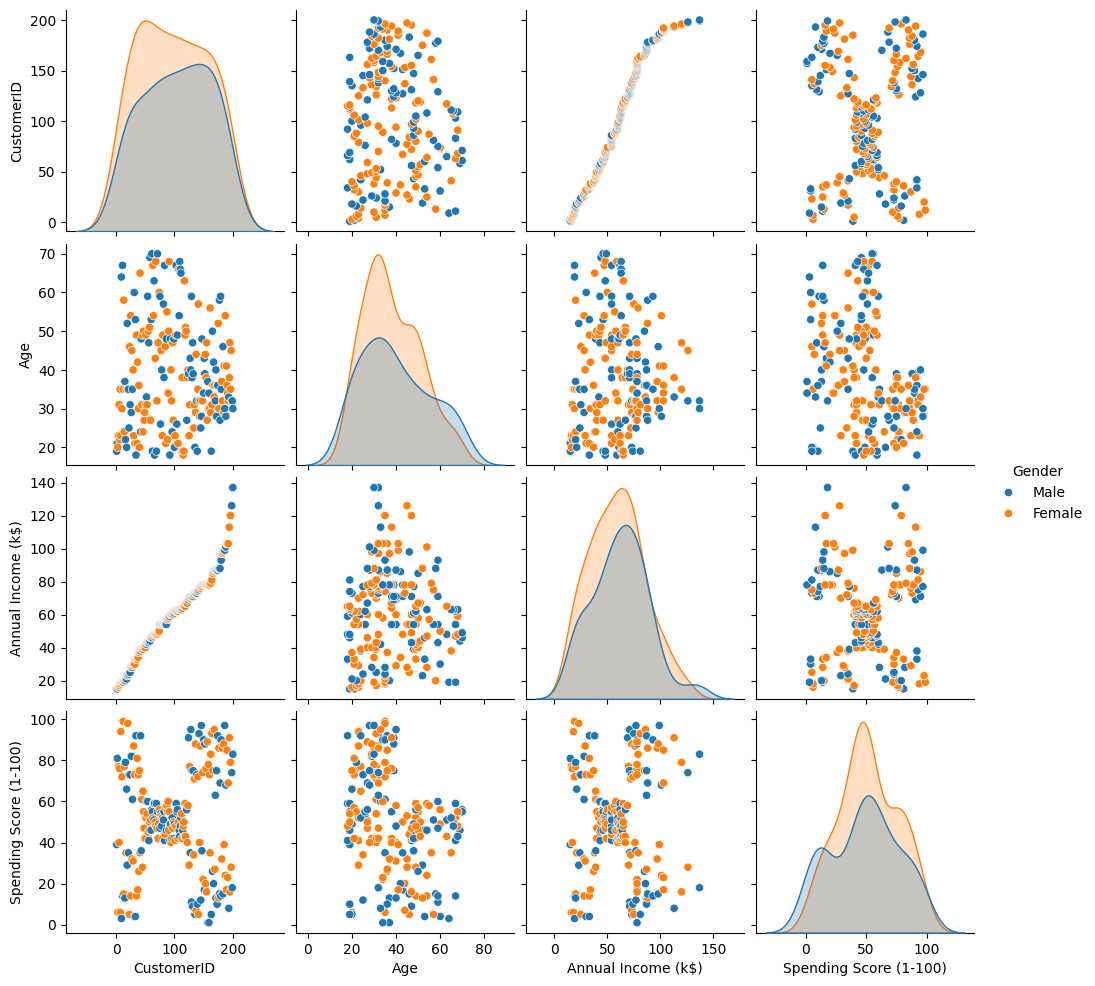

In [ ]:
sns.pairplot(df, hue='Gender')
#Vytvoří tabulku grafů pro všechny numerické sloupce v DataFrame df a zabarví je podle pohlaví (Gender). Tento graf ukazuje vztahy mezi všemi možnými dvojicemi sloupců.

In [ ]:
df.groupby('Gender')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()
#Provede zeskupení dat podle pohlaví a spočítá průměrné hodnoty pro sloupce Age, Annual Income (k$) a Spending Score (1–100) pro každé pohlaví zvlášť.

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df.select_dtypes(include=['number']).corr()
#Spočítá korelační matici mezi numerickými sloupci v DataFrame v rozsahu -1 po 1.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


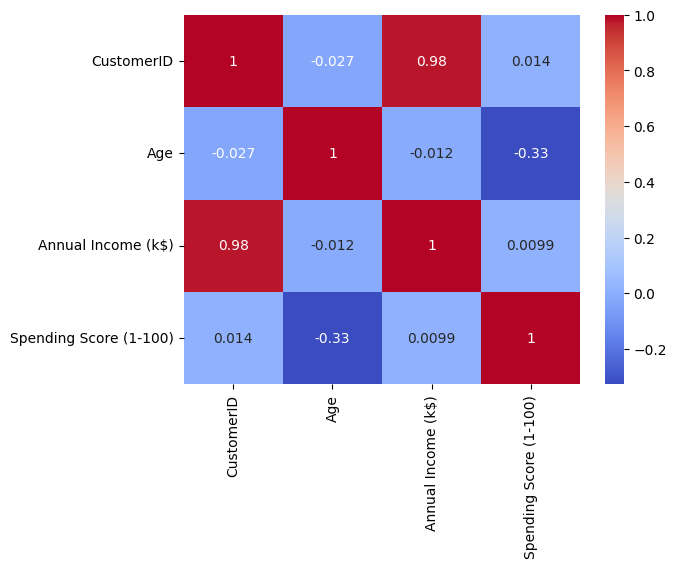

In [14]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
#Vybere všechny numerické sloupce a spočítá korelaci mezi nimi. Výsledkem bude korelační matice (tabulka, která ukazuje vztah mezi každými dvěma proměnnými). 
#Age a Spending Score (1–100):-0.33 – Slabá až středně silná negativní korelace. To znamená, že mladší zákazníci mají tendenci více utrácet, resp. mají vyšší spending score.
#Annual Income (k$) a Spending Score (1–100): 0.0099 – Téměř nulová korelace. To znamená, že výše příjmu téměř nijak nesouvisí s výší spending score.

## Clustering

In [15]:
clustering1=KMeans(n_clusters=3)
#Vytvoří model K-means clusteringu s 3 shluky (clusters).

In [16]:
clustering1.fit(df[['Annual Income (k$)']])
#Použije model KMeans k shlukování dat pouze na základě sloupce "Annual Income (k$)".

KMeans(n_clusters=3)

In [17]:
clustering1.labels_
#Vrátí labels (štítky) pro každý záznam v datasetu, které označují, do kterého shluku (clusteru) byl přiřazen.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [18]:
df['Income Cluster']=clustering1.labels_
df.head()
#Přidá nový sloupec 'Income Cluster' do DataFrame.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [19]:
df['Income Cluster'].value_counts()
#Spočítá počet záznamů v každém shluku (clusteru), který je přiřazen ve sloupci 'Income Cluster'.

Income Cluster
2    92
0    72
1    36
Name: count, dtype: int64

In [20]:
clustering1.inertia_
#Vrátí hodnotu inertia (inercie) pro model KMeans. Inercie je míra toho, jak dobře jsou data rozdělena mezi shluky.

23528.152173913055

In [21]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
#Inertia_scores bude seznam hodnot inercie pro počty shluků od 1 do 10. Tento seznam umožní vidět, jak se mění inercie s rostoucím počtem shluků.

In [22]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2822.4996947496943,
 2168.4787157287155,
 1737.1612554112553]

Text(0.5, 1.0, 'Elbow Method')

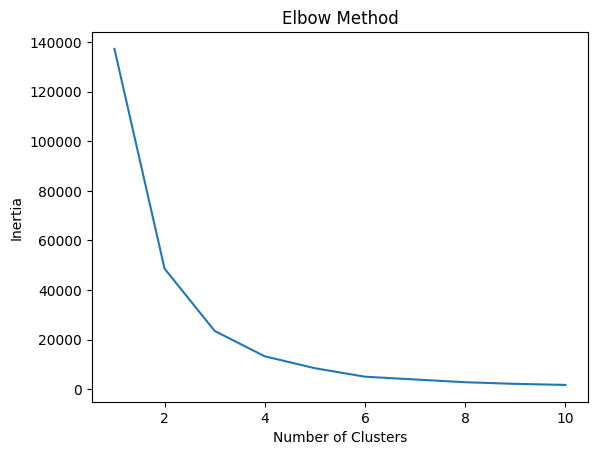

In [23]:
plt.plot(range(1,11),inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
#Vykreslí graf, který ukazuje, jak se mění hodnota inercie v závislosti na počtu shluků (od 1 do 10). Tento graf je možné použít k vizualizaci, jak se model KMeans chová při různém počtu shluků.

In [24]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
#Výstup bude tabulka, která ukazuje průměrné hodnoty pro věk, roční příjem a skóre utrácení v rámci jednotlivých shluků Income Cluster.

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


In [25]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()
#Nový sloupec (Spending and Income Cluster) ukáže, do jakého shluku spadají jednotliví zákazníci podle jejich ročního příjmu a skóre utrácení.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0


Text(0.5, 1.0, 'Elbow Method')

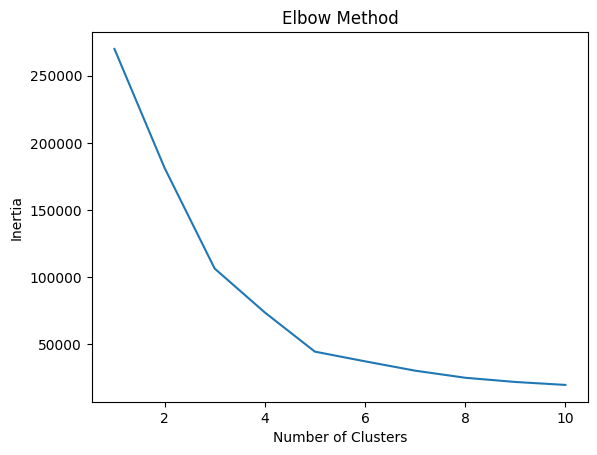

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
#Vytvoří graf, který umožní vizualizovat, jak se mění inercie při různém počtu shluků.

In [27]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
#Vytvoří nový DataFrame centers, který obsahuje centroidy (střední hodnoty) pro každý shluk v následujících sloupcích:'x': Průměrný roční příjem v daném shluku. 'y': Průměrné spendovací skóre v daném shluku.
centers

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,25.727273,79.363636


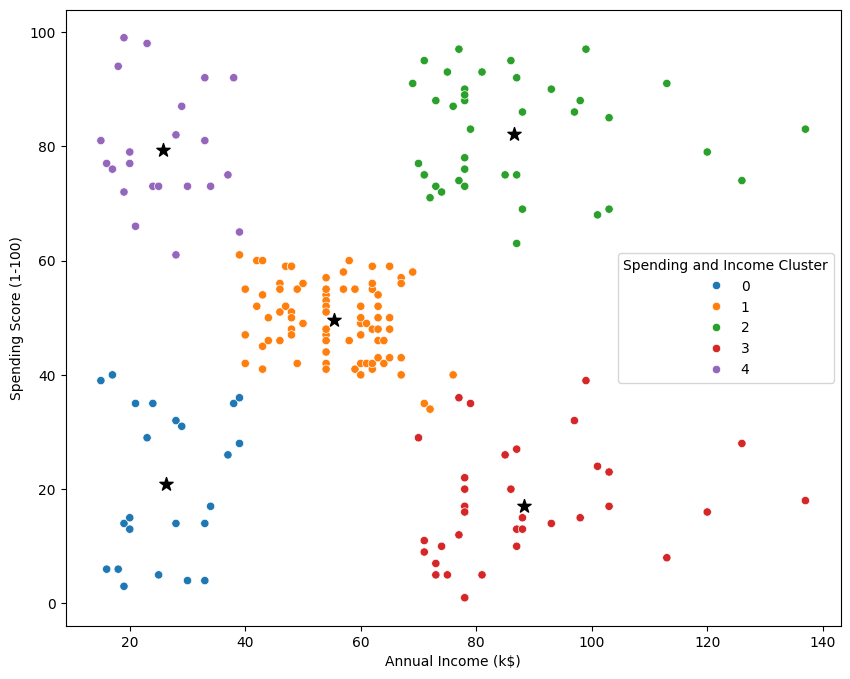

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')
#Výsledkem bude graf s bodem pro každý záznam v datasetu, přičemž centroidy shluků budou vyznačeny černými hvězdami. Tento graf poskytuje vizuální přehled o tom, jak jsou zákazníci rozděleni do jednotlivých shluků podle těchto dvou proměnných.

In [29]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')
#Vrací kontingenční tabulku, kde řádky odpovídají jednotlivým shlukům ('Spending and Income Cluster') a sloupce pohlaví ('Gender'). Hodnoty v tabulce vyjadřují procentuální zastoupení pohlaví v rámci každého shluku.

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.590909,0.409091


In [ ]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
#Vrací DataFrame s průměrnými hodnotami věku, ročního příjmu a skóre utrácení pro jednotlivé shluky. Každý řádek v tabulce představuje jeden shluk a sloupce zobrazují průměrné hodnoty jednotlivých proměnných.

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [31]:
from sklearn.preprocessing import StandardScaler
#Příkaz importuje třídu StandardScaler z knihovny sklearn.preprocessing. StandardScaler je nástroj pro standardizaci dat, což znamená, že přepočítá každý sloupec dat na základě průměru (mean) a standardní odchylky (standard deviation).

In [ ]:
scale = StandardScaler()
#Vytváří instanci třídy StandardScaler.

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0


In [ ]:
dff = pd.get_dummies(df,drop_first=True)
#Převádí kategorické proměnné na binární sloupce.
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,0,True
1,2,21,15,81,0,4,True
2,3,20,16,6,0,0,False
3,4,23,16,77,0,4,False
4,5,31,17,40,0,0,False


In [35]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [36]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [37]:
dff = scale.fit_transform(dff)

In [ ]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame(scale.fit_transform(dff))
#Provádí standardizaci dat v DataFrame.
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Text(0.5, 1.0, 'Elbow Method')

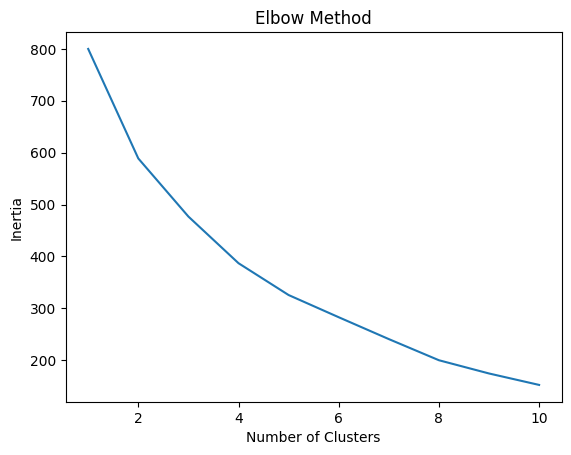

In [42]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
#Provádí vyhledávání optimálního počtu shluků (clusters) pro K-means algoritmus na standardizovaných datech.

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,3
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,3


In [41]:
df.to_csv('Clustering.csv')